## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import config_notebook as c
import datetime

## Set global parameters

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## Initialize models

In [5]:
from src.unet import UNet

# Initialize models
unet = UNet()

## Load data

In [6]:
from src.dataloader_anaglyph_reversed import make_dataloaders

# Make dataloaders
training_dl = make_dataloaders(path_anaglyph=c.TRAIN_ANAGLYPH_FILE, path_reversed=c.TRAIN_REVERSED_FILE)
validation_dl = make_dataloaders(path_anaglyph=c.VALIDATION_ANAGLYPH_FILE, path_reversed=c.VALIDATION_REVERSED_FILE)
print(len(training_dl), len(validation_dl))

156 39


In [7]:
first_item = next(iter(training_dl))
print(first_item['a'].shape)
print(first_item['r'].shape)

torch.Size([16, 3, 256, 256])
torch.Size([16, 3, 256, 256])


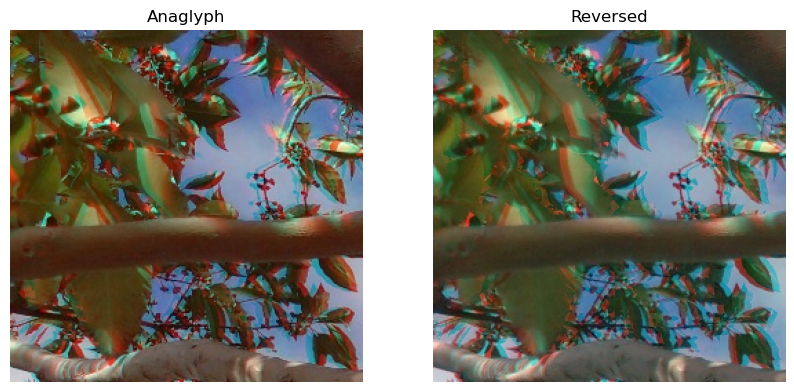

In [8]:
import torchvision.transforms as T

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

transform = T.ToPILImage()

# Plot the anaglyph image
axes[0].imshow(transform(first_item['a'][0]))  # Convert tensor to image
axes[0].set_title("Anaglyph")
axes[0].axis("off")

# Plot the reversed image
axes[1].imshow(transform(first_item['r'][0]))  # Convert tensor to image
axes[1].set_title("Reversed")
axes[1].axis("off")

plt.show()

## Training function

In [9]:
from src.train_unet import set_global_config
from src.train_unet import train_unet

# Create timestamp for training runs
training_run_timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
print (f"Started training at {training_run_timestamp}")

Started training at 20250123_172425


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch [1/1], Loss (MSE): 0.0523, Loss (MAE): 0.1994, Loss (SSIM): 0.8116, Loss (PSNR): -12.8191
Epoch [1/1], Validation Loss (MSE): 0.0584, Validation Loss (MAE): 0.2144, Validation Loss (SSIM): 0.6930, Validation Loss (PSNR): -12.3347


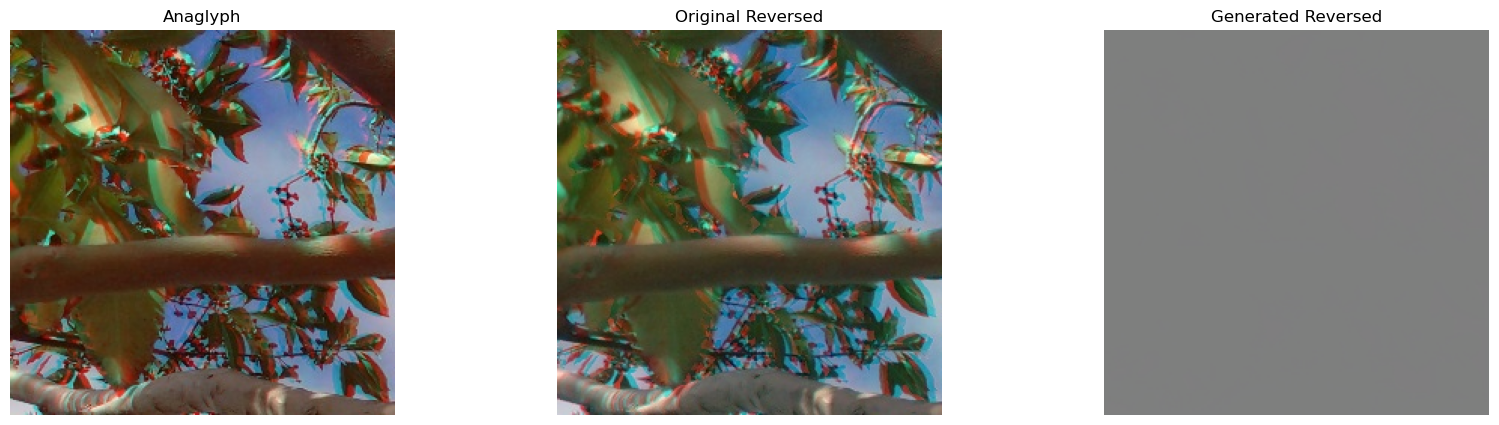

Checkpoint saved at ./models/test/unet_checkpoint_20250123_172425_epoch1.pth


In [10]:
# Test run to check if everything works

import config_notebook_test_run

# Set train config
set_global_config(config_notebook_test_run)

single_item_dl = make_dataloaders(path_anaglyph=c.TRAIN_ANAGLYPH_FILE, path_reversed=c.TRAIN_REVERSED_FILE, files_limit=1)

train_unet(model=unet, train_dl=single_item_dl, val_dl=single_item_dl, device=device, timestamp=training_run_timestamp)

In [ ]:
import config_notebook

# Set train config
set_global_config(config_notebook)

train_unet(model=unet, train_dl=training_dl, val_dl=validation_dl, device=device, timestamp=training_run_timestamp)